# Class Imbalance

One of the common roadblocks faced by ML Engineers are class imbalances. In this tutorial, we will explore the problem of 
class imbalance and discuss strategies to handle them.

<br>
<center>
<img src="./assets/class_imbalance.png" width="750">
</center>
<br>

__What is Class Imbalance?__


Imbalanced datasets are those where the distribution of classes are significantly skewed, with one class being dominant while the others are under represented. Such datasets pose unique challenges when it comes to building effective ML models.

In part 1 of this tutorial, we will explore various metrics used to evaluate imbalanced datasets and demonstrate how they provide a more comprehensive evaluation of model performance when compared to accuracy.

The metrics we will explore are as follows - 
- Precision
- Recall
- F1 Score
- ROC Curve

Finally, in part 2 of this tutorial we will conclude by exploring various strategies to overcome the challenges posed by imbalanced datasets and improve the performance of our machine learning models.

The strategies which will be covered are -
- Resampling Techniques
- Ensemble Methods
- Cost Sensitive Learning

We will be using the following libraries in this tutorial - 
- [Imbalanced-learn](https://imbalanced-learn.org/)
- [Pandas](https://pandas.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/) 
- [Plotly](https://plotly.com/)
- [Numpy](https://numpy.org/)

__So let's get started!__

First let's install and import the necessary libraries


In [49]:
%pip install --upgrade imblearn pandas scikit-learn plotly nbformat numpy --quiet

Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

# SK Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Let's create a dummy imbalanced dataset!

In [83]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of instances
n_instances = 1000

# Define the class imbalance ratio
imbalance_ratio = 0.8  # 80% apples, 20% oranges

# Create the fruit column with imbalance
fruit = np.random.choice(['apples', 'oranges'], size=n_instances, p=[imbalance_ratio, 1 - imbalance_ratio])

# Create the target column randomly
target = np.random.choice([1, 0], size=n_instances, p=[imbalance_ratio, 1 - imbalance_ratio])

# Create the DataFrame
df = pd.DataFrame({'Fruit': fruit, 'Target': target})

In [52]:
df.head()

,Fruit,Target
0,apples,1
1,oranges,1
2,apples,1
3,apples,0
4,apples,1


In [53]:
# Calculate class counts
class_counts = df['Fruit'].value_counts()

# Create a bar plot to visualize class imbalance
fig = px.bar(
    class_counts,
    x=class_counts.index,
    y=class_counts.values,
    labels={'x': 'Fruit', 'y': 'Count'},
    title='Class Imbalance'
)
fig.show()

### Binary Classification

First let's prepare the dataset for classification by label encoding the categorical column __Fruit__ 

A detailed guide on Encoding Strategies can be found here - [LINK](https://www.youtube.com/watch?v=hScdIm7BEnk&feature=youtu.be&ab_channel=AlisterLuiz)

In [54]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Fruit' column
df['Fruit_Encoded'] = label_encoder.fit_transform(df['Fruit'])

# Re-arrange columns for readability
df = df[['Fruit', 'Fruit_Encoded', 'Target']]

In [55]:
df.head()

,Fruit,Fruit_Encoded,Target
0,apples,0,1
1,oranges,1,1
2,apples,0,1
3,apples,0,0
4,apples,0,1


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Fruit_Encoded'],  # Input features
    df['Target'],     # Target variable
    test_size=0.2,    # 80% training, 20% testing
    random_state=42
)

In [57]:
# Sample X_train
X_train[:5].values

array([0, 1, 0, 0, 1])

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800,), (800,), (200,), (200,))

In [59]:
# Reshape X Train and Test Series
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [60]:
X_train[:5]

array([[0],
       [1],
       [0],
       [0],
       [1]])

In [61]:
# Create and train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

### Part 1 - Evaluation Metrics for Imbalanced Datasets

#### Confusion Matrix

Before diving deep into Accuracy, Precision, Recall, and F1 Score; it is important that we demystify the confusion behind confusion matrices :)

<center>
<img src="./assets/confusion_matrix.png" width="450">
</center>

Let's see an example,

<center>
<img src="./assets/confusion_matrix_example.webp" width="500">
</center>


Lets interpret the results,
<center>
<br>

__True Positive__

Interpretation: You predicted positive and it’s true.

You predicted that a cat is indeed a cat.

<br>

__True Negative__

Interpretation: You predicted negative and it’s true.

You predicted that a dog is indeed not a dog.

<br>

__False Positive (Type 1 Error)__

Interpretation: You predicted positive and it’s false.

You predicted that it is a cat however it's a dog.

<br>

__False Negative (Type 2 Error)__

Interpretation: You predicted negative and it’s false.

You predicted that it's a dog however it's a cat.

</center>


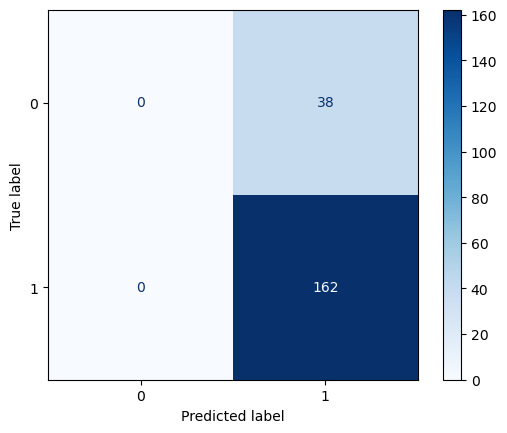

In [97]:
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap="Blues")

#### Accuracy

Accuracy can be defined as the ratio of correct predictions to the total number of predictions made by the model.


\begin{align}
Accuracy = \frac{Number \hspace{0.2em} of \hspace{0.2em} Correct \hspace{0.2em} Predictions}{Total \hspace{0.2em} Number \hspace{0.2em} of \hspace{0.2em} Predictions}
\end{align}

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy*100:.2f} %")

Accuracy: 81.00 %


### Precision

Precision can be defined as from all the classes we have predicted as positive, how many are actually positive.

\begin{align}
Precision = \frac{True \hspace{0.2em} Positive}{True \hspace{0.2em} Positive + False \hspace{0.2em} Positive}
\end{align}

In [64]:
# Calculate precision
precision = precision_score(y_test, y_pred)

# Print the precision
print(f"Precision: {precision*100:.2f} %")

Precision: 81.00 %


### Recall

Recall can be defined as from all the positive classes, how many have we predicted correctly.

\begin{align}
Recall = \frac{True \hspace{0.2em} Positive}{True \hspace{0.2em} Positive + False \hspace{0.2em} Negative}
\end{align}

In [65]:
# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the recall
print(f"Recall: {recall*100:.2f} %")

Recall: 100.00 %


A summary of Precision and Recall is given below,

<center>
<img src="./assets/precision_recall_summary.webp" width="400">
</center>

### F1 Score

Since it's difficult to compare two models with low precision and high recall or vice versa, we use F1 Score. 


\begin{align}
F1 \hspace{0.2em} Score = \frac{2 \times Recall \times Precision}{Recall + Precision}
\end{align}

F1 Score utilizes Harmonic Mean between precision and recall and punishes the extreme values more.

In [66]:
# Calculate F1 Score
f1_score = f1_score(y_test, y_pred)

# Print the F1 Score
print(f"F1 Score: {f1_score*100:.2f} %")

F1 Score: 89.50 %


### ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters -
- True Positive Rate
- False Positive Rate

<center>
<img src="./assets/roc_curve.png" width="300">
</center>

In [67]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Print the F1 Score
print(f"AUC-ROC Score: {auc_roc*100:.2f} %")


AUC-ROC Score: 50.00 %


In [68]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Create a DataFrame with fpr and tpr values
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

# Plot the ROC curve using Plotly Express
fig = px.line(roc_df, x='False Positive Rate', y='True Positive Rate', title='ROC Curve')
fig.add_shape(type='line', line=dict(dash='dash'), x0=0, y0=0, x1=1, y1=1)

# Display the AUC-ROC score and plot the ROC curve
fig.show()

Since the accuracy is high while the ROC AUC score is 50%, it indicates that the classifier is performing poorly in terms of distinguishing between the positive and negative classes.


This scenario typically occurs when we have an imbalanced dataset or when the classifier is not able to capture the underlying patterns effectively.

### Part 2 - Overcoming Class Imbalance

In this sectio, we will explore various strategies to tackle class imbalance in machine learning. We'll dive into resampling techniques, ensemble methods, and cost-sensitive learning approaches. These strategies will help us overcome the challenges posed by imbalanced datasets and improve the performance of our models.

 In this section, we will explore resampling techniques, which are widely used strategies for handling imbalanced datasets. Resampling involves manipulating the dataset by either increasing the number of instances in the minority class (oversampling) or decreasing the number of instances in the majority class (undersampling). 